In [1]:
'''
Lab N
Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html
'''

"\nLab N\nMorphology\n\nSkimage morphology operators' documentation:\nhttps://scikit-image.org/docs/dev/api/skimage.morphology.html\n"

In [3]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def RGB2binary(img_path,threshold):
    img=io.imread(img_path,as_gray=True)
    img=np.array(img*255,dtype=np.uint8)
    Vimg=np.reshape(img,(img.shape[0]*img.shape[1],1))
    Vimg[(Vimg<threshold)]=0
    Vimg[(Vimg>=threshold)]=255
    img=np.reshape(Vimg,(img.shape[0],img.shape[1]))
    return img

In [5]:
def Dilation(img,window=np.ones((3,3))):
    window_height=window.shape[0]
    window_width=window.shape[1]
    centre_x=int(np.ceil(window.shape[0]/2))
    centre_y=int(np.ceil(window.shape[1]/2))
    dilated_img=np.copy(img)
    for i in range(0,img.shape[0]-window_height+1):
        for j in range (0,img.shape[1]-window_width+1):
            part=np.array((img[i:window_height+i,j:window_width+j]))
            #no need for else because if it doesn't hit then the tageted pixel is for sure equlas 0
            if(np.max(part*window)!=0):
                dilated_img[i+centre_y-1,j+centre_x-1]=255
    return dilated_img

In [6]:
def Erosion(img,window=np.ones((3,3))):
    nonZero=np.count_nonzero(window)
    window_height=window.shape[0]
    window_width=window.shape[1]
    centre_x=int(np.ceil(window.shape[0]/2))
    centre_y=int(np.ceil(window.shape[1]/2))
    eroded_img=np.copy(img)
    for i in range(0,img.shape[0]-window_height+1):
        for j in range (0,img.shape[1]-window_width+1):
            part=np.array((img[i:window_height+i,j:window_width+j]))
            if(np.count_nonzero(part*window)==nonZero):
                eroded_img[i+centre_y-1,j+centre_x-1]=255
            else:
                 eroded_img[i+centre_y-1,j+centre_x-1]=0
    return eroded_img

In [7]:
test=np.ones((3,3))
test[0,0]=0
test[0,2]=0
test[2,0]=0
test[2,2]=0
print(test)
# print(np.ceil(2.5))
# test=np.ones((5,5))
# test2=np.zeros((5,5))
# print(np.max(test2))
# test2[0,1]=0
# print(test*test2)
# test[0,2]=100
# print(test)
# print("#############")
# print(test.shape)
# part=np.array((test[0:5,0:5]))
# print(part)    

[[0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


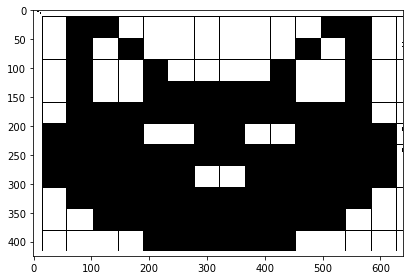

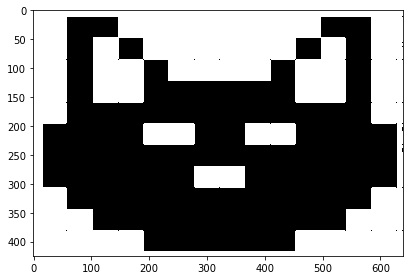

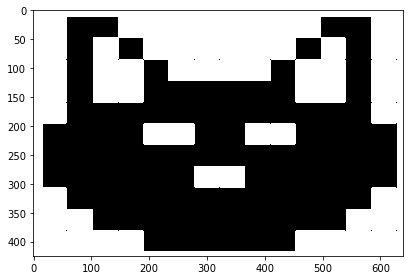

'\n1) Erosion / Dilation:\n    - Load "coins.jpg" from the img folder\n    - Convert the image to binary\n    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the      binary image\n    - Use Skimage\'s "binary_erosion" & "binary_dilation" & show the results\n'

In [8]:
#set threshold to 150 to see that dilation has great effect to expand the 1's in the image and eleminate some zeros 
#threshold of 150 makes most of pixels in the image black
#binary=RGB2binary("img/coins.jpg",150)
binary=RGB2binary("img/cat.jpg",150)

io.imshow(binary)
io.show()
##########################################
# test cross window with size 3*3
window=np.ones((3,3))
window[0,0]=0
window[0,2]=0
window[2,0]=0
window[2,2]=0
##########################################
#test square window with size 5*5
window2=np.ones((5,5))
##########################################
my_dilated=Dilation(binary,window)
io.imshow(my_dilated)
io.show()
###########################################
dilated=binary_dilation(binary,selem=window)
io.imshow(dilated)
io.show()
###########################################

'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the      binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


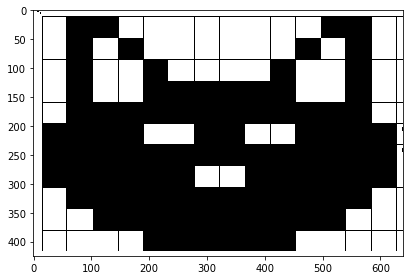

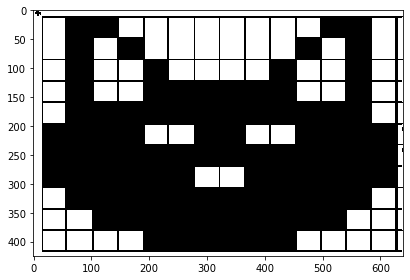

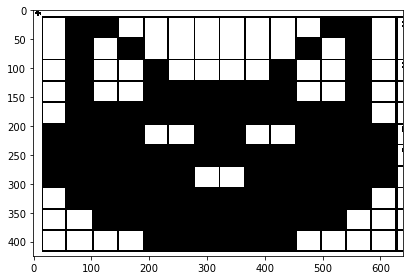

In [9]:
binary=RGB2binary("img/cat.jpg",105)
#binary=RGB2binary("img/coins.jpg",105)
io.imshow(binary)
io.show()
window2=np.ones((5,5))
window=np.ones((3,3))
window[0,0]=0
window[0,2]=0
window[2,0]=0
window[2,2]=0
my_eroded=Erosion(binary,window)
io.imshow(my_eroded)
io.show()
eroded=binary_erosion(binary,selem=window)
io.imshow(eroded)
io.show()


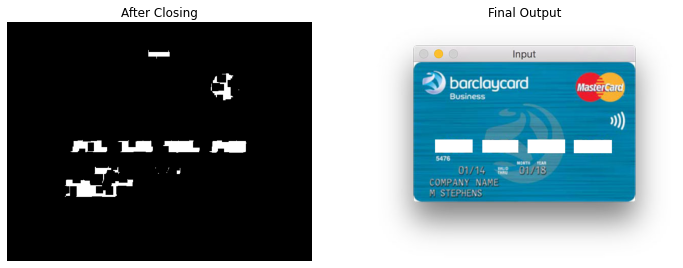

In [16]:


'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
binary=RGB2binary("img/card.jpg",70)
binary=255-binary

binary= Dilation(binary,window=np.ones((12,12)))

binary= Erosion(binary,window=np.ones((12,12)))


closing=binary
bounding_boxes = []
boxes=find_contours(binary,0)
for box in boxes:
    yMax = int(np.max(box[:,0]))
    yMin = int(np.min(box[:,0]))
    xMax = int(np.max(box[:,1]))
    xMin = int(np.min(box[:,1]))
    if (xMax-xMin)/(yMax-yMin) > 2.5 and (xMax-xMin)/(yMax-yMin) < 3.5 :
        bounding_boxes.append([xMin,xMax,yMin,yMax])


img_with_boxes= io.imread("img/card.jpg")
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=binary.shape)
    img_with_boxes[rr,cc] = 255 #set color white
show_images([closing,img_with_boxes],['After Closing','Final Output'])

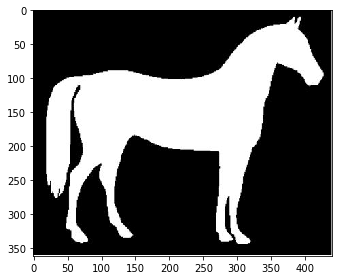

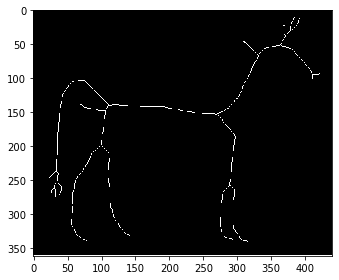

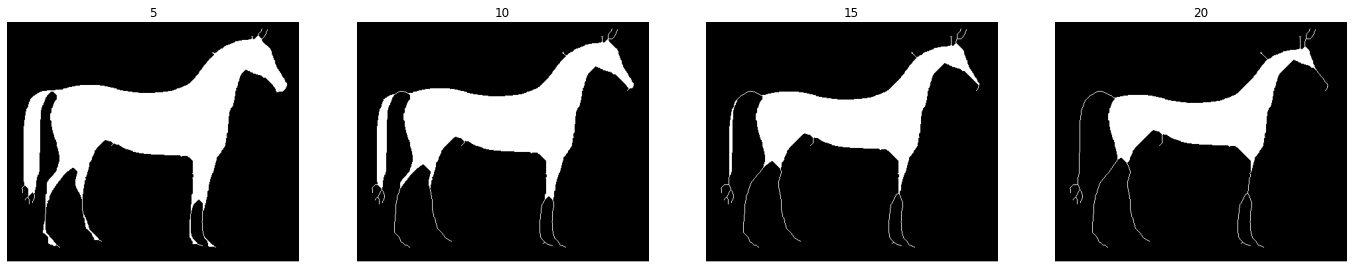

In [17]:
'''
3) Skeletonization:
'''
#    - Load "horse.jpg" from the img folder  
img = io.imread("./img/horse.jpg", as_gray = True)
io.imshow(img)
plt.show()

#    - Use a binary threshold of 0.9 to remove invisible noise in the background
bin_img = img > 0.9

#    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
skeleton_img = skeletonize(bin_img)
io.imshow(skeleton_img)
plt.show()

#    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
max_iter = [5, 10, 15, 20] #100
imgs = []
for it in max_iter:
    imgs.append(thin(bin_img, it))
show_images(imgs, max_iter)
